# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     |Santiago Escutia Ríos   |
| **Fecha**      | 3/2/2026  |
| **Expediente** |757839   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt


df = pd.read_csv('Advertising.csv', index_col=0)

print(df.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

In [8]:
X = sm.add_constant(df['TV'])
model_tv = sm.OLS(df['sales'], X).fit()


n = len(df)
p = 2  
rss = model_tv.ssr  
rse = np.sqrt(rss / (n - p))  


se_beta = model_tv.bse

inf = model_tv.params - 2 * se_beta
sup = model_tv.params + 2 * se_beta

print(f"SE: {se_beta}")
print(f"Intervalos: {inf} a {sup}")

SE: const    0.457843
TV       0.002691
dtype: float64
Intervalos: const    6.116908
TV       0.042155
dtype: float64 a const    7.948279
TV       0.052918
dtype: float64


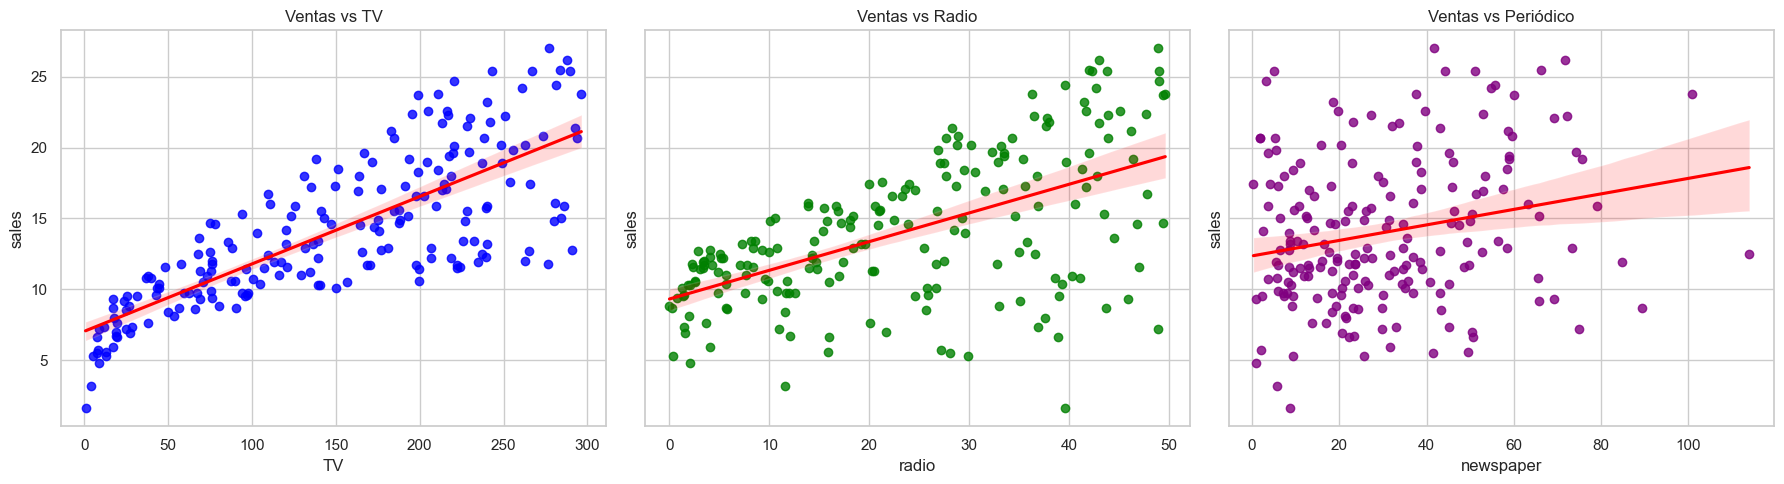

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 1. Gráfico para TV
sns.regplot(ax=axes[0], x='TV', y='sales', data=df, color='blue', line_kws={"color": "red"})
axes[0].set_title('Ventas vs TV')

# 2. Gráfico para Radio
sns.regplot(ax=axes[1], x='radio', y='sales', data=df, color='green', line_kws={"color": "red"})
axes[1].set_title('Ventas vs Radio')

# 3. Gráfico para Periódico
sns.regplot(ax=axes[2], x='newspaper', y='sales', data=df, color='purple', line_kws={"color": "red"})
axes[2].set_title('Ventas vs Periódico')

plt.tight_layout()
plt.show()

In [9]:
import statsmodels.api as sm

X_multi = sm.add_constant(df[['TV', 'radio', 'newspaper']])
y = df['sales']


results = sm.OLS(y, X_multi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        12:39:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

*Sí hay relación entre presupuesto para publicidad y para ventas, porque se ve que conforma aumneta uno el otro también.*

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

*Sí, nos sirve conocer ese impacto porque antes de invertir dinero en algo hay que estar seguros que la inversión generará ganancias.*

**¿Cuáles medios están asociados con las ventas? TV y radio, en las regresiones los p values son 0.

¿Qué tan grande es la asociación entre un medio específico y las ventas?** 

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? No, el periodico no aporta.

 ¿Conviene más invertir sólo en uno? No, en radio y TV.

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?** Muy seguros dado que los errores son cercanos a 1.

**¿La relación es lineal?** Sí, por como crecen los datos se ve que es lineal.

**¿Hay sinergia entre estos medios?** Sí porque los datos crecen de forma co nstante.

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [53]:
import pandas as pd
import statsmodels.api as sm

# 1. Cargar datos
df = pd.read_csv('Advertising.csv')

# 2. Definir variables (X es TV, y es ventas)
X = df[['TV']]
y = df['sales']

# 3. Agregar la constante (el intercepto beta_0)
X = sm.add_constant(X)

# 4. Crear y entrenar el modelo
modelo = sm.OLS(y, X).fit()

# 5. Ver resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.47e-42
Time:                        13:41:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

*Se ve que los reultados de esta regresión es 7.0326 y 0.0475.*

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

*Es la totalidad de lo que quieres estudiar y la muestra es una parte de las población que usas para analizar.*

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

*La regresión con todos los  datos va a ser perfecta y no habría errores muestreales, en cambio si la haces con una muestra los resultados serían un poco menos precisos y los coeficientes cambiarían según la muestra.*

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df = pd.read_csv('Advertising.csv')
df.head()

x = np.array (df[['TV']])
y = np.array (df['sales'])
lr = LinearRegression()
lr.fit(x,y)
lr.intercept_
lr.coef_
n,p = x.shape
xbar = np.mean(x)
aux= np.sum((x - xbar)**2)
y2= lr.predict(x)
RSS = np.sum((y - y2)**2)
var = RSS/(n-p)
SE_1 = np.sqrt(var/aux)
SE_0= SE_1 * np.sqrt(np.sum(x**2)/n)
print("SE b1:", SE_1)
print("SE b0:", SE_0)

SE b1: 0.0026838383539596546
SE b0: 0.4566911323097188


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [12]:
from scipy.stats import t

alpha = 0.05          # 95% de confianza
gl = n - 2            # grados de libertad (regresión simple)

t_crit = t.ppf(1 - alpha/2, gl)

In [71]:
IC_b0 = (lr.intercept_ - t_crit * SE_0, lr.intercept_ + t_crit * SE_0)
IC_b1 = (lr.coef_[0] - t_crit * SE_1, lr.coef_[0] + t_crit * SE_1)

print(f"Intervalo de confianza para b0 (Intercepto): {IC_b0}")
print(f"Intervalo de confianza para b1 (TV): {IC_b1}")

Intervalo de confianza para b0 (Intercepto): (np.float64(6.131990654241175), np.float64(7.933196444014211))
Intervalo de confianza para b1 (TV): (np.float64(0.042244064291330374), np.float64(0.052829216574709154))


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

*La nula es lo que esta por defecto hasta que la evidencia nos haga rechazarla, la alternativa es donde se quiere probar que algo cambia.*

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [39]:
from sklearn.linear_model import LinearRegression
x= Advertising[["TV"]]
y= Advertising[["sales"]]
Lr_Advertising= LinearRegression()

In [28]:
lr_advertising.fit(x, y)

beta_0 = lr_advertising.intercept_

print("Intercepto (beta_0):", beta_0)


Intercepto (beta_0): [7.03259355]


In [36]:
lr_advertising.fit(x, y)

beta_1 = lr_advertising.coef_

print("Intercepto (beta_1):", beta_1)


Intercepto (beta_1): [[0.04753664]]


In [37]:
t1= beta_1/SE_1
print("t para b1:", t1)

t para b1: [[17.71218463]]


In [38]:
t0= beta_0/SE_0
print("t para b0:", t0)

t para b0: [15.3990149]


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [51]:
from scipy import stats
import numpy as np

n = len(df)
p = 2 

t_b1 = lr.coef_[0] / SE_1

t_b0 = lr.intercept_ / SE_0

p_b1 = 2 * (1 - stats.t.cdf(np.abs(t_b1), df=n - p))
p_b0 = 2 * (1 - stats.t.cdf(np.abs(t_b0), df=n - p))

print("Estadístico t b1:", t_b1)
print("p-valor b1:", p_b1)

print("\nEstadístico t b0:", t_b0)
print("p-valor b0:", p_b0)

Estadístico t b1: 17.712184626501678
p-valor b1: 0.0

Estadístico t b0: 15.399014895604166
p-valor b0: 0.0


¿Se rechaza la hipótesis nula? ¿Qué significa?

*Sí, se rechaza la hipótesis nula, estos significa que las relaciones observadas no fueron al azar.*

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

In [59]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('Advertising.csv')

X_radio = sm.add_constant(df['radio'])
mod_radio = sm.OLS(df['sales'], X_radio).fit()

print("--- REGRESIÓN: VENTAS VS RADIO ---")
print(f"Coeficientes: \n{mod_radio.params}")
print(f"\nErrores Estándar: \n{mod_radio.bse}")
print(f"\nIntervalos de Confianza: \n{mod_radio.conf_int()}")
print(f"\nEstadísticos t: \n{mod_radio.tvalues}")
print(f"\np-values: \n{mod_radio.pvalues}")

--- REGRESIÓN: VENTAS VS RADIO ---
Coeficientes: 
const    9.311638
radio    0.202496
dtype: float64

Errores Estándar: 
const    0.562900
radio    0.020411
dtype: float64

Intervalos de Confianza: 
              0          1
const  8.201588  10.421688
radio  0.162244   0.242747

Estadísticos t: 
const    16.542245
radio     9.920765
dtype: float64

p-values: 
const    3.561071e-39
radio    4.354966e-19
dtype: float64


In [57]:
X_news = sm.add_constant(df['newspaper'])
mod_news = sm.OLS(df['sales'], X_news).fit()

print("--- REGRESIÓN: VENTAS VS PERIÓDICO ---")
print(f"Coeficientes: \n{mod_news.params}")
print(f"\nErrores Estándar: \n{mod_news.bse}")
print(f"\nIntervalos de Confianza: \n{mod_news.conf_int()}")
print(f"\nEstadísticos t: \n{mod_news.tvalues}")
print(f"\np-values: \n{mod_news.pvalues}")

--- REGRESIÓN: VENTAS VS PERIÓDICO ---
Coeficientes: 
const        12.351407
newspaper     0.054693
dtype: float64

Errores Estándar: 
const        0.621420
newspaper    0.016576
dtype: float64

Intervalos de Confianza: 
                   0          1
const      11.125956  13.576859
newspaper   0.022005   0.087381

Estadísticos t: 
const        19.876096
newspaper     3.299591
dtype: float64

p-values: 
const        4.713507e-49
newspaper    1.148196e-03
dtype: float64


## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [43]:
import statsmodels.api as sm
x2= sm.add_constant(x)
model= sm.OLS(y, x2)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.47e-42
Time:                        13:09:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
o= np.array (df[["radio","TV", "newspaper"]])
y= np.array (df["sales"])
o2= sm.add_constant(o)
model= sm.OLS(y, o2)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        13:09:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.1885      0.009     21.893      0.000       0.172       0.206
x2             0.0458      0.001     32.809      0.000       0.043       0.049
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

*Porque en las simples donde se invierte en uno se invierte en otro juntos (estan relacionadas), y en las multiples se ve individualmente su efecto y se ve que no aporta*

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*